In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load embeddings data
df = pd.read_csv("lfw_arnie_nonarnie.csv")
print(df.head())
print(df.shape)


          0         1         2         3         4         5         6  \
0 -2.061987  0.581320 -0.249115 -0.631340 -1.359899  0.751619 -0.029364   
1 -0.796838 -0.667228 -0.107889  0.019755 -0.686348  0.912779  0.463412   
2  5.376779  1.142695  2.543111 -2.727212  0.272785 -0.972187  1.111221   
3  7.029235  1.242883 -2.628079  1.224479 -1.141370 -1.620647  0.205890   
4  5.484822  6.752706 -4.291114  1.740412 -1.603087 -1.075175  1.919936   

          7         8         9  ...       141       142       143       144  \
0  1.610456  0.341402  1.286709  ... -0.356844 -0.016488 -0.228473  0.258134   
1 -0.238308 -0.294023  0.215470  ... -0.037243 -0.012105 -0.351285 -0.034968   
2  1.645502 -2.556968 -0.648781  ...  0.157441 -0.333875 -0.303720 -0.085975   
3  1.567561  0.736200  0.010782  ...  0.051040 -0.068796  0.141841 -0.227999   
4 -0.197615  1.030596  1.451936  ...  0.034412  0.265141  0.226000  0.032064   

        145       146       147       148       149  Label  
0  0.04

In [3]:
# Step 3: Split Features and Label
X = df.drop("Label", axis=1)
y = df["Label"]


In [4]:
# Step 4: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


In [6]:
! pip install catboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Step 6: Initialize Models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

}


In [8]:
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"🔹 {name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


Training: SVM (RBF)
🔹 SVM (RBF) Accuracy: 0.7895
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38

------------------------------------------------------------
Training: Random Forest


c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

🔹 Random Forest Accuracy: 0.7895
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38

------------------------------------------------------------
Training: Logistic Regression
🔹 Logistic Regression Accuracy: 0.7895
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38

------------------------------------------------------------
Training: KNN


c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

🔹 KNN Accuracy: 0.7895
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38

------------------------------------------------------------
Training: XGBoost


c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

🔹 XGBoost Accuracy: 0.7632
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        30
           1       0.00      0.00      0.00         8

    accuracy                           0.76        38
   macro avg       0.39      0.48      0.43        38
weighted avg       0.62      0.76      0.68        38

------------------------------------------------------------
Training: LightGBM
🔹 LightGBM Accuracy: 0.7895
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38

------------------------------------------------------------
Training: CatBoost


c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-p

🔹 CatBoost Accuracy: 0.7895
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38

------------------------------------------------------------
Training: MLP Neural Net


c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

🔹 MLP Neural Net Accuracy: 0.7632
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        30
           1       0.00      0.00      0.00         8

    accuracy                           0.76        38
   macro avg       0.39      0.48      0.43        38
weighted avg       0.62      0.76      0.68        38

------------------------------------------------------------


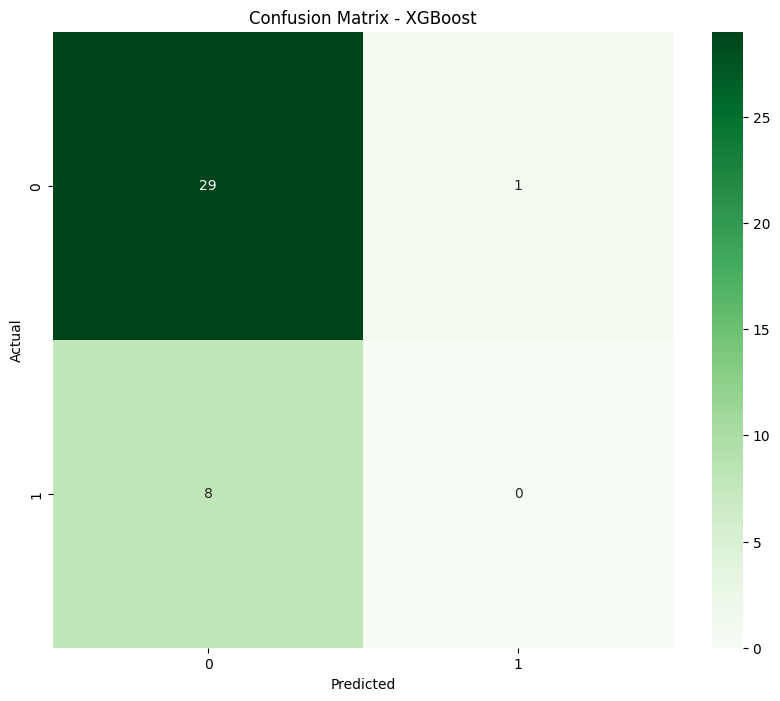

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

best_model = models["XGBoost"]
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [10]:
# New input vector (replace with real embedding)
new_embedding = np.random.rand(1, 150)
new_scaled = scaler.transform(new_embedding)

# Predict with best model
pred_label = best_model.predict(new_scaled)
print("Predicted Label:", pred_label[0])


Predicted Label: 0


c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
# Summary accuracy table
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

result_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values("Accuracy", ascending=False)
print(result_df)


                 Model  Accuracy
0            SVM (RBF)  0.789474
1        Random Forest  0.789474
2  Logistic Regression  0.789474
3                  KNN  0.789474
5             LightGBM  0.789474
6             CatBoost  0.789474
4              XGBoost  0.763158
7       MLP Neural Net  0.763158


c:\Users\harendra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [12]:
! pip install tensorflow
# ! pip install opencv-python


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# 1. Load and scale
X = df.drop('Label', axis=1).values
y = df['Label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. One-hot encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_cat, test_size=0.2, stratify=y_cat, random_state=42
)

# 4. Reshape for CNN input [samples, timesteps, channels]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(149, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


NameError: name 'face_recognition' is not defined

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)


TypeError: BaseMultilayerPerceptron.fit() got an unexpected keyword argument 'validation_data'

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


AttributeError: 'MLPClassifier' object has no attribute 'evaluate'